# 2D post processing

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib, shlex, subprocess
import xbout
import scipy
import xhermes
from xhermes import *


sys.path.append(r"/users/jpm590/2dspace/post-processing/sdtools/")


from hermes3.utils import *


from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.selectors import *

%load_ext autoreload
%autoreload 2
print("Done")
import hermes3



Done


## Read Hermes-3

name = whatever you want to name the case

id = the folder name of the case

In [2]:
db = CaseDB(
    case_dir = r"/Users/zero/workspace/phd_work/hms_output/2D-post-processing/",
    grid_dir = r"/Users/zero/workspace/phd_work/hms_output/2D-post-processing/grid"
)

toload = [
    dict(name="250929-shorter-test", id="250929-shorter-test", unnormalise_geom = True, use_xhermes = True, squash = True)
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)
    cs[case["name"]].extract_2d_tokamak_geometry()
    

- Reading case 250929-shorter-test
-----------------------
- Looking for squash file
- Squash file found. squash date 10/03/2025, 15:08:01, dmp file date 09/30/2025, 14:46:53

Unnormalising with xHermes


In [19]:
m = cs["250929-shorter-test"].ds #.metadata
# m
# print(f'Species in model: \n {m["species"]}')
# print(f'\nCharged species: \n {m["charged_species"]}')
ds = cs["250929-shorter-test"].ds.isel(t=-1)
ds



<xarray.Dataset> Size: 5MB
Dimensions:                  (x: 40, theta: 108)
Coordinates: (12/24)
    dx                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dy                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dz                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    zShift                   (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    t                        float64 8B 0.00054
    psi_poloidal             (x, theta) float64 35kB -0.001427 ... 0.00634
    ...                       ...
    Zxy_upper_left_corners   (x, theta) float64 35kB -1.287 -1.279 ... -1.725
    Zxy_upper_right_corners  (x, theta) float64 35kB -1.286 -1.277 ... -1.698
  * x                        (x) int64 320B 0 1 2 3 4 5 6 ... 34 35 36 37 38 39
  * theta                    (theta) float64 864B 0.07854 0.2356 ... 16.73 16.89
    zeta                     float64 8B 3.142
    theta_idx                (theta) int64 864B 0 1 2 3 4 ... 104 105 106 107
Data variables: (12/157)
    Bxy                      (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Dnnd                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed+_VgradP               (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed+_iz                   (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed+_rec                  (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    Ed+e_coll                (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    ...                       ...
    dv                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dr                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    hthe                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dl                       (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dtor                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
    dpol                     (x, theta) float64 35kB dask.array<chunksize=(40, 108), meta=np.ndarray>
Attributes:
    squashoutput_version:  0.2.1
    metadata:              {'BOUT_VERSION': 5.12, 'Bnorm': 1.0, 'Cs0': 97871....
    options:               nout = 20000000            # number of writes\ntim...
    regions:               {'lower_inner_PFR': <xbout.region.Region>\n\tname\...
    geometry:              toroidal
    components:            {'d+': {'type': 'evolve_density, evolve_momentum, ...

To access the functions under `hermesm`, see [accessors.py](https://github.com/mikekryjak/sdtools/blob/4242b6f0a55edf66d0b6e6f706bb7dc8515eb143/hermes3/accessors.py#L9)

`select_custom_sol_ring`: to create custom SOL ring beyond the separatrix.

 - `sepadd`: the number of cells beyond the first cell center outside of separatrix

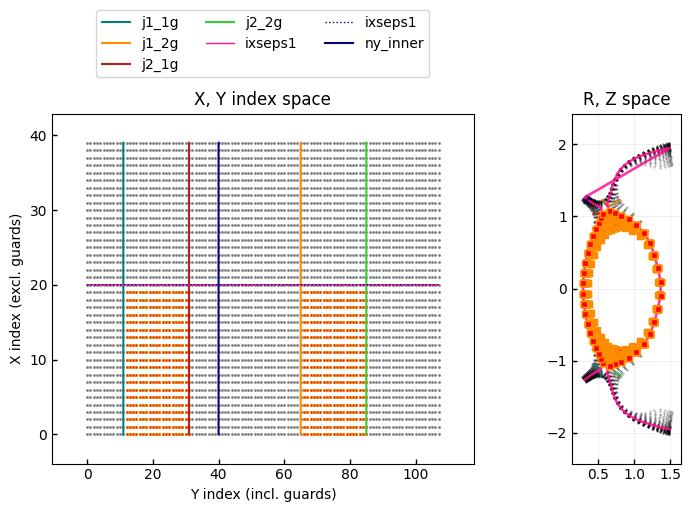

In [4]:
ds = cs["250929-shorter-test"].ds.isel(t=-1)
plot_selection(ds, ds.hermesm.select_region("core"))


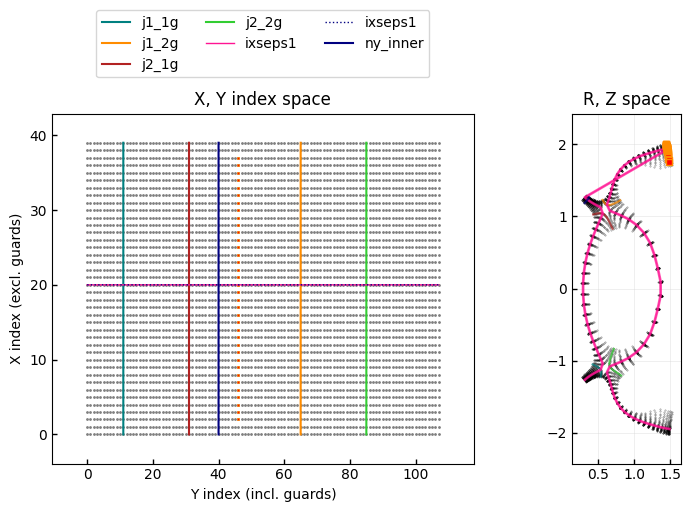

In [5]:
plot_selection(ds, ds.hermesm.select_region("outer_upper_target"))


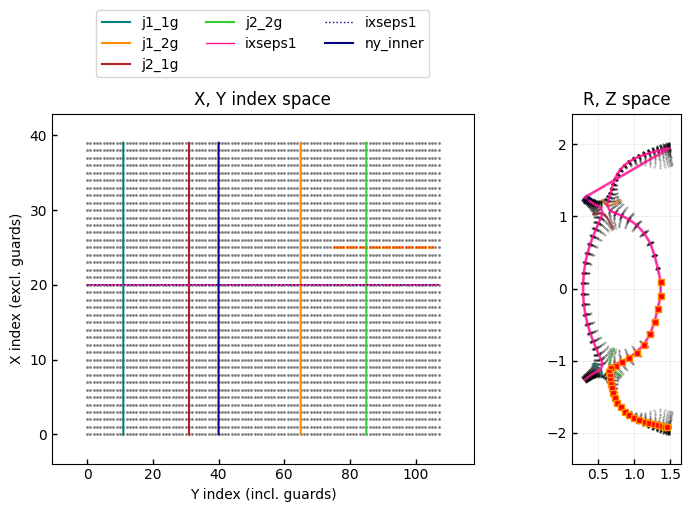

In [12]:
plot_selection(ds, ds.hermesm.select_custom_sol_ring(sepadd = 5, region="outer_lower"))


### Using selection to plot quantities of interest
#### Plot of separatrix density evolusion

Text(0.5, 1.0, 'Separatrix density evolution')

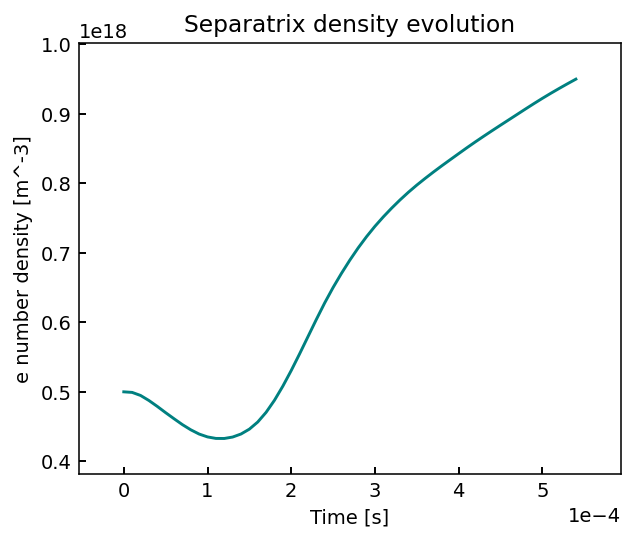

In [8]:
ds = cs["250929-shorter-test"].ds
ds.hermesm.select_region("outer_midplane_a_sep")["Ne"].plot()
plt.title("Separatrix density evolution")


### Plot target temperature history

- guard cells are included by default

Text(0.5, 1.0, 'Target temperature history')

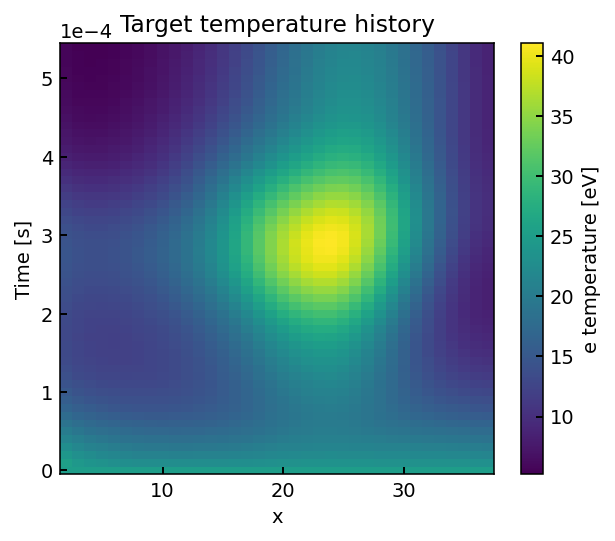

In [9]:
ds = cs["250929-shorter-test"].ds
ds.hermesm.select_region("outer_lower_target")["Te"].plot()
plt.title("Target temperature history")

### Plotting radial and poloidal information
#### get 1d poloidal data


R         Z      dpol       Bxy      Bpxy         Te        Td+  \
26  1.271744 -1.891140  0.063018  0.372229  0.022812  23.393996  24.781035   
27  1.329433 -1.906233  0.055930  0.355957  0.019776  23.351902  24.642637   
28  1.379877 -1.918517  0.047607  0.342882  0.017890  23.313058  24.564625   
29  1.421888 -1.927684  0.038107  0.332717  0.016701  23.281835  24.595927   
30  1.454247 -1.933782  0.027469  0.325296  0.015963  23.259601  24.766106   

           Td      dpar      Spol       Spar  
26  40.569609  1.028292  2.462933  20.473817  
27  25.672683  1.006700  2.518862  21.480516  
28   0.698030  0.912449  2.566469  22.392965  
29   0.130538  0.759186  2.604576  23.152151  
30   0.000000  0.559746  2.632045  23.711897

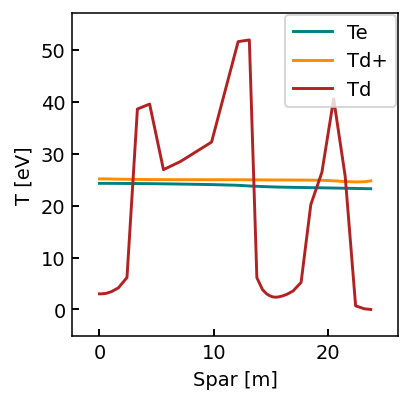

In [11]:
ds = cs["250929-shorter-test"].ds.isel(t=1)
df_fieldline = get_1d_poloidal_data(ds, params = ["Te", "Td+", "Td"], region = "outer_lower", sepdist = 0.001)
display(df_fieldline.tail(5))

fig, ax = plt.subplots(figsize = (3,3))
ax.plot(df_fieldline["Spar"], df_fieldline["Te"], label = "Te")
ax.plot(df_fieldline["Spar"], df_fieldline["Td+"], label = "Td+")
ax.plot(df_fieldline["Spar"], df_fieldline["Td"], label = "Td")
ax.set_xlabel("Spar [m]")
ax.set_ylabel("T [eV]")
ax.legend()

t  total_poloidal_distance      zeta        dr         Te  \
31  0.00054                      NaN  3.141593  0.001632  26.918549   
32  0.00054                      NaN  3.141593  0.001835  23.084372   
33  0.00054                      NaN  3.141593  0.002054  19.811677   
34  0.00054                      NaN  3.141593  0.002288  17.276861   
35  0.00054                      NaN  3.141593  0.002537  15.766009   

          Td+         Td      Srad  sep  
31  90.148984  21.796190  0.010208    0  
32  83.684306  21.256858  0.011941    0  
33  77.792432  20.661364  0.013885    0  
34  72.990680  20.010506  0.016056    0  
35  70.063426  19.342695  0.018469    0

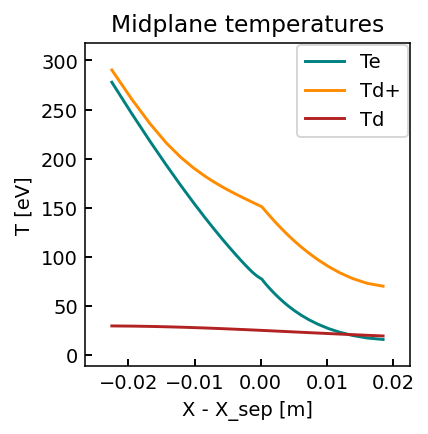

In [ ]:
df_midplane = get_1d_radial_data(ds, params = ["Te", "Td+", "Td"], region = "imp")
display(df_midplane.tail(5))

fig, ax = plt.subplots(figsize = (3,3))
ax.plot(df_midplane["Srad"], df_midplane["Te"], label = "Te")
ax.plot(df_midplane["Srad"], df_midplane["Td+"], label = "Td+")
ax.plot(df_midplane["Srad"], df_midplane["Td"], label = "Td")
ax.set_xlabel("X - X_sep [m]")
ax.set_ylabel("T [eV]")
ax.set_title("Midplane temperatures")
ax.legend()
